# Part I - Loan Data from Prosper Exploration
## by Agustin Barto

In [105]:
import calendar

from pathlib import Path
from urllib import request
from zipfile import ZipFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display, Markdown, HTML

%matplotlib inline

## Table of Contents

* [Introduction](#introduction)
* [Preliminary Wrangling](#preliminary-wrangling)
    * [Data Dictionary](#data-dictionary)

## Introduction<a class="anchor" id="introduction"></a>

I've chosen the "Loan Data from Prosper" dataset as it strikes a good balance between size, complexity and richness. It has a lot of variables to chose from, both numerical and categorical and enough samples to provided meaningful results.

As we'll show in the following section, the data set contains quite a lot of columns to chose from. During the wrangling process we'll briefly explore the dataset to decide which columns are going to be the focus of the analysis. Whenever needed, the column definition will be expanded with external sources.

## Preliminary Wrangling<a class="anchor" id="preliminary-wrangling"></a>

### Data dictionary<a class="anchor" id="data-dictionary"></a>

 The following table (converted to CSV from the original [Google sheet](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)) contains a brief description of each column:

In [2]:
variable_definitions_df = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/export?format=csv",
)

In [3]:
styler = variable_definitions_df\
    .style\
    .set_properties(
        **{'text-align': 'left'}
    )\
    .hide(axis="index")
display(HTML(styler.to_html()))

Variable,Description
ListingKey,"Unique key for each listing, same value as the 'key' used in the listing object in the API."
ListingNumber,The number that uniquely identifies the listing to the public as displayed on the website.
ListingCreationDate,The date the listing was created.
CreditGrade,The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
Term,The length of the loan expressed in months.
LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket."
ClosedDate,"Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses."
BorrowerAPR,The Borrower's Annual Percentage Rate (APR) for the loan.
BorrowerRate,The Borrower's interest rate for this loan.
LenderYield,The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.


### Downloading the dataset

We assume the dataset has been included with the submission, but in case it had to be removed due to size constraints, the following cell checks if the data is available and downloads it if it is not.

In [4]:
prosper_load_data_csv_zip = Path("./prosperLoanData.csv.zip")

In [5]:
def download_compress_dataset():
    try:
        with request.urlopen("https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv") as f:
            with ZipFile(prosper_load_data_csv_zip, "w") as zf:
                with zf.open("prosperLoanData.csv", "w") as g:
                    g.write(f.read())
    except Exception as e:
        display(Markdown(f"> <span style='color: red;'>**Exception raised retrieving data set:**</span> {e}"))
        prosper_load_data_csv_zip.unlink()

In [6]:
if not prosper_load_data_csv_zip.exists():
    download_compress_dataset()

### Loading the dataset

Once the dataset has been downloaded (and compressed), pandas can just read the CSV file straight out of the zip file:

In [7]:
prosper_load_data_df = pd.read_csv(prosper_load_data_csv_zip)

### What is the structure of your dataset?

In [8]:
prosper_load_data_df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
97229,533B3577537164662F8C92B,763142,2013-04-29 14:45:23.623000000,NaN,36,Completed,2014-01-17 00:00:00,0.32538,0.2859,0.2759,...,-25.56,0.0,0.0,0.0,0.0,1.0,0,0,0.0,63
69238,DC4335444064569384FEC7F,581975,2012-04-24 11:30:54.237000000,NaN,60,Current,NaN,0.20705,0.1830,0.1730,...,-101.72,0.0,0.0,0.0,0.0,1.0,0,0,0.0,37
18963,617C35949239631928B0C72,1009538,2013-11-11 07:17:10.167000000,NaN,60,Current,NaN,0.22601,0.2015,0.1915,...,-37.43,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
24180,58E1358188967885950361F,814416,2013-06-19 02:55:21.017000000,NaN,60,Current,NaN,0.22693,0.2024,0.1924,...,-97.14,0.0,0.0,0.0,0.0,1.0,0,0,0.0,190
87343,FF293596082225681DBE938,1063007,2013-12-09 16:37:58.623000000,NaN,36,Current,NaN,0.14206,0.1139,0.1039,...,-18.47,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [9]:
prosper_load_data_df.shape

(113937, 81)

In [10]:
prosper_load_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The dataset is comprised of 113937 rows (loans) and 81 columns. The purpose of each column is described in the [data dictionary](#section). Before we delve into the contents, we need to make sure certain basic data hygiene criteria are met. Are there any duplicate rows?

In [11]:
prosper_load_data_df.duplicated().sum()

0

Are there multiple records with the same ``ListingKey`` values?

In [12]:
prosper_load_data_df.ListingKey.duplicated().sum()

871

There are entries with the same ``ListingKey``. Let's explore this records to determine whether we need to drop the duplicates or not.

In [13]:
prosper_load_data_df[prosper_load_data_df.ListingKey.duplicated(keep=False)].sort_values("ListingKey").head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32680,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,...,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32681,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,...,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32964,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
17274,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7478,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
33220,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
27677,01163604029146842E28D9C,1233732,2014-02-25 14:33:39.830000000,NaN,36,Current,NaN,0.31975,0.2800,0.2700,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
788,01163604029146842E28D9C,1233732,2014-02-25 14:33:39.830000000,NaN,36,Current,NaN,0.31975,0.2800,0.2700,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
27360,014F35910923350802E1B29,930618,2013-09-26 16:44:24.163000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,-27.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
18324,014F35910923350802E1B29,930618,2013-09-26 16:44:24.163000000,NaN,60,Current,NaN,0.19323,0.1695,0.1595,...,-27.50,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


From these sample, we can assume that there are all duplicated entries which can be safely removed. Notice that we've copied the original datafrome onto a new variable ``prosper_load_data_clean_df`` to keep the original data as reference.

In [14]:
prosper_load_data_clean_df = prosper_load_data_df.copy()

In [15]:
prosper_load_data_clean_df = prosper_load_data_clean_df[~prosper_load_data_clean_df.ListingKey.duplicated()]

In [16]:
prosper_load_data_clean_df.shape

(113066, 81)

Now we're left with 113066 rows. Additional clean-up might be performed on the next section where we have to analyze the contents of the chosen columns.

### What is/are the main feature(s) of interest in your dataset?

The initial set of columns of our interest is the following (you can check the [data dictionary](#data-dictionary) for an explanation of each column):

* ``ListingCreationDate``
* ``CreditGrade``
* ``Term``
* ``LoanStatus``
* ``ClosedDate``
* ``BorrowerAPR``
* ``BorrowerRate``
* ``ProsperRating (Alpha)``
* ``ListingCategory (numeric)``
* ``Occupation``
* ``EmploymentStatus``
* ``EmploymentStatusDuration``
* ``IsBorrowerHomeowner``
* ``DebtToIncomeRatio``
* ``IncomeRange``
* ``LoanOriginalAmount``
* ``LoanOriginationDate``
* ``InvestmentFromFriendsCount``
* ``InvestmentFromFriendsAmount``
* ``Investors``

This set of columns was chosen with the idea of analyzing the influence of socio-economic and financial factors on multiple aspects of the loans:

* Which factors influence the APR the most?
* Certain occupations benefited with softer loans more than others?
* What's the impact of having investment from friends on loans?
* Are there any specific patterns of variables for each loan category?
* How did the loans fared over the years. Is the 2008 global crisis represented?
* Are there specific period with higher activity than others?

Before we can proceed with the analysis, we need to explore each column to determine whether its contents or structure are appropriate for our needs, and if they aren't, can they be adapted or do we need to exclude them?

#### ``ListingCreationDate``, ``ClosedDate``, ``LoanOriginationDate``

In [17]:
prosper_load_data_clean_df[["ListingCreationDate", "ClosedDate", "LoanOriginationDate"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ListingCreationDate  113066 non-null  object
 1   ClosedDate           55076 non-null   object
 2   LoanOriginationDate  113066 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


In [18]:
prosper_load_data_clean_df[["ListingCreationDate", "ClosedDate", "LoanOriginationDate"]].sample(5)

,ListingCreationDate,ClosedDate,LoanOriginationDate
107177,2014-01-30 12:29:41.537000000,NaN,2014-02-03 00:00:00
48901,2012-07-22 09:18:37.607000000,2013-03-02 00:00:00,2012-07-30 00:00:00
28864,2008-02-27 15:33:56.007000000,2010-06-09 00:00:00,2008-03-12 00:00:00
10128,2013-12-24 08:13:37.623000000,NaN,2013-12-30 00:00:00
105759,2014-03-01 09:24:07.017000000,NaN,2014-03-05 00:00:00


These three columns represent dates, with ``ListingCreationDate`` in particular also containing time information, but are stored as strings. Before we can continue, we should convert these columns to ``datetime64`` using pandas' ``to_datetime``.

In [19]:
prosper_load_data_clean_df["ListingCreationDate"] = pd.to_datetime(prosper_load_data_clean_df.ListingCreationDate)
prosper_load_data_clean_df["ClosedDate"] = pd.to_datetime(prosper_load_data_clean_df.ClosedDate)
prosper_load_data_clean_df["LoanOriginationDate"] = pd.to_datetime(prosper_load_data_clean_df.LoanOriginationDate)

In [20]:
prosper_load_data_clean_df[["ListingCreationDate", "ClosedDate", "LoanOriginationDate"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113066 non-null  datetime64[ns]
 1   ClosedDate           55076 non-null   datetime64[ns]
 2   LoanOriginationDate  113066 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 3.5 MB


Let's now focus on the contents of these columns. The first observation is that ``ClosedDate`` is only populated on 55076 rows. This means that if we want to analyse closed loands, we'll have to limit our observations to these rows.

In [21]:
display(Markdown(f"""\
* **ListingCreationDate**: min = {prosper_load_data_clean_df.ListingCreationDate.min()}, max = {prosper_load_data_clean_df.ListingCreationDate.max()}
* **ClosedDate**: min = {prosper_load_data_clean_df.ClosedDate.min()}, max = {prosper_load_data_clean_df.ClosedDate.max()}
* **LoanOriginationDate**: min = {prosper_load_data_clean_df.LoanOriginationDate.min()}, max = {prosper_load_data_clean_df.LoanOriginationDate.max()}
"""))

* **ListingCreationDate**: min = 2005-11-09 20:44:28.847000, max = 2014-03-10 12:20:53.760000
* **ClosedDate**: min = 2005-11-25 00:00:00, max = 2014-03-10 00:00:00
* **LoanOriginationDate**: min = 2005-11-15 00:00:00, max = 2014-03-12 00:00:00


This means that our dataset goes from November 2005 until March 2014.

#### ``CreditGrade``, ``ProsperRating (Alpha)``

According to the [data dictionary](#data-dictionary), ``CreditGrade`` will only be populated for loans prior to 2009, while ``ProsperRating (Alpha)`` will be available for deals from 2009 onwards. This situation will make any global analysis on these columns impossible, it might be interesting to analyse each period in isolation or to perform a comparison between the two variables.

In [22]:
prosper_load_data_clean_df.CreditGrade.isna().sum()

84113

In [23]:
prosper_load_data_clean_df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

According to Prosper's [API documentation](https://www.prosper.com/Downloads/Services/Documentation/ProsperAPI_Objects_Details.html) this is a categorial column with the following scale:

1. NC
2. HR
3. E
4. D
5. C
6. B
7. A
8. AA

In [24]:
prosper_load_data_clean_df["ProsperRating (Alpha)"].isna().sum()

29084

In [25]:
prosper_load_data_clean_df["ProsperRating (Alpha)"].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

According to Prosper's [API documentation](https://www.prosper.com/Downloads/Services/Documentation/ProsperAPI_Objects_Details.html) and the following [article](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline) this is a categorial column with the following scale:

1. NA
2. HR
3. E
4. D
5. C
6. B
7. A
9. AA

Although there seems to be a correspondence between values, we cannot assume these columns are compatible, so they will be kept separate. Given that these are ordinal categorical values, we should convert them accordingly.

In [26]:
prosper_load_data_clean_df["CreditGrade"] = prosper_load_data_clean_df.CreditGrade.astype(
    pd.CategoricalDtype(ordered=True, categories=["NC", "HR", "E", "D", "C", "B", "A", "AA"])
)
prosper_load_data_clean_df["ProsperRating (Alpha)"] = prosper_load_data_clean_df["ProsperRating (Alpha)"].astype(
    pd.CategoricalDtype(ordered=True, categories=["NA", "HR", "E", "D", "C", "B", "A", "AA"])
)

In [27]:
prosper_load_data_clean_df[["CreditGrade", "ProsperRating (Alpha)"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CreditGrade            28953 non-null  category
 1   ProsperRating (Alpha)  83982 non-null  category
dtypes: category(2)
memory usage: 1.1 MB


Are there any loands without values for either of these columns?

In [28]:
(prosper_load_data_clean_df.CreditGrade.isna() & prosper_load_data_clean_df["ProsperRating (Alpha)"].isna()).sum()

131

We're to drop these rows as we think these variables are essential for our analysis.

In [29]:
prosper_load_data_clean_df = prosper_load_data_clean_df[
   (~prosper_load_data_clean_df.CreditGrade.isna()) | (~prosper_load_data_clean_df["ProsperRating (Alpha)"].isna())
]

In [30]:
(prosper_load_data_clean_df.CreditGrade.isna() & prosper_load_data_clean_df["ProsperRating (Alpha)"].isna()).sum()

0

#### ``Term``

In [31]:
prosper_load_data_clean_df.Term.nunique()

3

In [32]:
prosper_load_data_clean_df.Term.value_counts()

36    87094
60    24228
12     1613
Name: Term, dtype: int64

Given that we're only seeing three possible values for the ``Term`` column, we could be tempted to convert it to a categorical type, but since the documentation clearly states that these are to be interpreted as months, we shouldn't convert it.

In [33]:
prosper_load_data_clean_df.Term.isna().sum()

0

There are no loans without a ``Term`` value.

#### ``LoanStatus``

In [34]:
prosper_load_data_clean_df.LoanStatus.nunique()

12

In [35]:
prosper_load_data_clean_df.LoanStatus.value_counts()

Current                   55730
Completed                 37939
Chargedoff                11986
Defaulted                  5015
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Are there any loans without a ``LoanStatus`` value?

In [36]:
prosper_load_data_clean_df.LoanStatus.isna().sum()

0

According to the documentation, this column violates the Tidy Data principle of one variable per column is it contains both the load status and the delinquency bucket:

> The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

We're going to convert ``LoanStatus`` to a categorical type and move the delinquency bucket into its own categorical column named ``DelinquencyBucket``.

In [37]:
(prosper_load_data_clean_df[prosper_load_data_clean_df.LoanStatus.str.match(r"^Past Due.*$")]).LoanStatus.str.extract(r"^Past Due \((.*) days\)$").value_counts()

1-15      800
31-60     361
61-90     311
91-120    304
16-30     265
>120       16
dtype: int64

In [38]:
prosper_load_data_clean_df["DelinquencyBucket"] = (
    prosper_load_data_clean_df[prosper_load_data_clean_df.LoanStatus.str.match(r"^Past Due.*")]
).LoanStatus.str.extract(r"^Past Due \((.*) days\)$")

In [39]:
prosper_load_data_clean_df["DelinquencyBucket"] = prosper_load_data_clean_df.DelinquencyBucket.astype(
    pd.CategoricalDtype(ordered=True, categories=["1-15", "16-30", "31-60", "61-90", "91-120", ">120"])
)

In [40]:
prosper_load_data_clean_df.DelinquencyBucket.info()

<class 'pandas.core.series.Series'>
Int64Index: 112935 entries, 0 to 113936
Series name: DelinquencyBucket
Non-Null Count  Dtype   
--------------  -----   
2057 non-null   category
dtypes: category(1)
memory usage: 992.8 KB


Now we can remove the delinquency bucket info from the past due loans.

In [41]:
prosper_load_data_clean_df["LoanStatus"] = prosper_load_data_clean_df.LoanStatus.str.extract(r"^(Current|Completed|Chargedoff|Defaulted|Past Due|FinalPaymentInProgress|Cancelled).*")

In [42]:
prosper_load_data_clean_df["LoanStatus"].value_counts()

Current                   55730
Completed                 37939
Chargedoff                11986
Defaulted                  5015
Past Due                   2057
FinalPaymentInProgress      203
Cancelled                     5
Name: LoanStatus, dtype: int64

Notice that the value counts match those shown above. Now we can safely convert the column to a nominal categorical type.

In [43]:
prosper_load_data_clean_df["LoanStatus"] = prosper_load_data_clean_df.LoanStatus.astype(
    pd.CategoricalDtype(ordered=False, categories=["Current", "Completed", "Chargedoff", "Defaulted", "FinalPaymentInProgress", "Past Due", "Cancelled"])
)

In [44]:
prosper_load_data_clean_df.LoanStatus.info()

<class 'pandas.core.series.Series'>
Int64Index: 112935 entries, 0 to 113936
Series name: LoanStatus
Non-Null Count   Dtype   
--------------   -----   
112935 non-null  category
dtypes: category(1)
memory usage: 992.9 KB


In [45]:
prosper_load_data_clean_df.LoanStatus.isna().sum()

0

#### ``BorrowerAPR``, ``BorrowerRate``

According to the data dictionary, ``BorrowerAPR`` is the Borrower's Annual Percentage Rate (APR) for the loan.
while ``BorrowerRate`` is the Borrower's interest rate for this loan. According to [this article](https://www.rocketmortgage.com/learn/comparing-mortgage-options-apr-vs-interest-rate), these two variables are similar as the APR does include the interest rate, alongside any other costs. Given this, we'll drop ``BorrowerRate`` from our analysis and focus solely on ``BorrowerAPR``.

In [46]:
prosper_load_data_clean_df = prosper_load_data_clean_df.drop("BorrowerRate", axis=1)

We're going to drop rows without a ``BorrowerAPR`` value:

In [47]:
prosper_load_data_clean_df = prosper_load_data_clean_df[~prosper_load_data_clean_df.BorrowerAPR.isna()]

In [48]:
prosper_load_data_clean_df.BorrowerAPR.describe()

count    112910.000000
mean          0.219018
std           0.080464
min           0.006530
25%           0.156290
50%           0.209860
75%           0.283860
max           0.512290
Name: BorrowerAPR, dtype: float64

#### ``ListingCategory (numeric)``

According to the dictionary, ``ListingCategory (numeric)`` is a categorial variable:

> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [49]:
sorted(prosper_load_data_clean_df["ListingCategory (numeric)"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

We're going to convert these numeric categories into their string counterparts to make it easier to perform analysis and visualizations. We'll create a new categorical typed column named ``ListingCategory``.

In [50]:
listing_categories = [
    "Not Available",       # 0
    "Debt Consolidation",  # 1
    "Home Improvement",    # 2
    "Business",            # 3
    "Personal Loan",       # 4
    "Student Use",         # 5
    "Auto",                # 6
    "Other",               # 7
    "Baby&Adoption",       # 8
    "Boat",                # 9
    "Cosmetic Procedure",  # 10
    "Engagement Ring",     # 11
    "Green Loans",         # 12
    "Household Expenses",  # 13
    "Large Purchases",     # 14
    "Medical/Dental",      # 15
    "Motorcycle",          # 16
    "RV",                  # 17
    "Taxes",               # 18
    "Vacation",            # 19
    "Wedding Loans"        # 20
]

listing_category_value_map = dict(enumerate(listing_categories))
listing_category_value_map

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby&Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcycle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loans'}

In [51]:
prosper_load_data_clean_df["ListingCategory"] = prosper_load_data_clean_df["ListingCategory (numeric)"].apply(
    lambda v: listing_category_value_map[v]
)

In [52]:
prosper_load_data_clean_df["ListingCategory"] = prosper_load_data_clean_df.ListingCategory.astype(
    pd.CategoricalDtype(ordered=False, categories=listing_categories)
)

In [53]:
prosper_load_data_clean_df.ListingCategory.info()

<class 'pandas.core.series.Series'>
Int64Index: 112910 entries, 0 to 113936
Series name: ListingCategory
Non-Null Count   Dtype   
--------------   -----   
112910 non-null  category
dtypes: category(1)
memory usage: 993.1 KB


#### ``Occupation``

In [54]:
prosper_load_data_clean_df.Occupation.nunique()

67

In [55]:
prosper_load_data_clean_df.Occupation.value_counts()

Other                          28392
Professional                   13508
Computer Programmer             4433
Executive                       4276
Teacher                         3724
                               ...  
Dentist                           67
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [56]:
prosper_load_data_clean_df.Occupation.isna().sum()  # Has missing values

3504

``Ocupation`` is a categorical variable and has to be converted as such, but given the number of categories, we'll have to be careful when presenting charts that includes it.

In [57]:
prosper_load_data_clean_df["Occupation"] = prosper_load_data_clean_df.Occupation.astype(
    pd.CategoricalDtype(
        ordered=False,
        categories=sorted(prosper_load_data_clean_df.Occupation.dropna().unique())  # Sorted alphabetically
    )
)

#### ``EmploymentStatus``, ``EmploymentStatusDuration``

In [58]:
prosper_load_data_clean_df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [59]:
prosper_load_data_clean_df.EmploymentStatus.isna().sum()  # Has missing values

2230

Once again, we'll convert this column into a categorical type.

In [60]:
prosper_load_data_clean_df["EmploymentStatus"] = prosper_load_data_clean_df.EmploymentStatus.astype(
    pd.CategoricalDtype(
        ordered=False,
        categories=sorted(prosper_load_data_clean_df.EmploymentStatus.dropna().unique())  # Sorted alphabetically
    )
)

Since ``EmploymentStatusDuration`` is expressed in number of months, we'll convert the column to ``Int64``.

In [61]:
prosper_load_data_clean_df["EmploymentStatusDuration"] = prosper_load_data_clean_df.EmploymentStatusDuration.astype("Int64")

In [62]:
prosper_load_data_clean_df.EmploymentStatusDuration.info()

<class 'pandas.core.series.Series'>
Int64Index: 112910 entries, 0 to 113936
Series name: EmploymentStatusDuration
Non-Null Count   Dtype
--------------   -----
105310 non-null  Int64
dtypes: Int64(1)
memory usage: 1.8 MB


#### ``IsBorrowerHomeowner``

In [63]:
prosper_load_data_clean_df.IsBorrowerHomeowner.nunique()

2

In [64]:
prosper_load_data_clean_df.IsBorrowerHomeowner.value_counts()

True     56987
False    55923
Name: IsBorrowerHomeowner, dtype: int64

In [65]:
prosper_load_data_clean_df.IsBorrowerHomeowner.isna().sum()

0

Since this is clearly a boolean column without any missing values, we'll convert it accordingly.

In [66]:
prosper_load_data_clean_df["IsBorrowerHomeowner"] = prosper_load_data_clean_df.IsBorrowerHomeowner.astype("bool")

In [67]:
prosper_load_data_clean_df.IsBorrowerHomeowner.info()

<class 'pandas.core.series.Series'>
Int64Index: 112910 entries, 0 to 113936
Series name: IsBorrowerHomeowner
Non-Null Count   Dtype
--------------   -----
112910 non-null  bool 
dtypes: bool(1)
memory usage: 992.4 KB


#### ``DebtToIncomeRatio``

In [68]:
prosper_load_data_clean_df.DebtToIncomeRatio.sample(5)

82958     0.17
26614     0.05
100905    0.09
52814     0.25
51027     0.12
Name: DebtToIncomeRatio, dtype: float64

In [69]:
prosper_load_data_clean_df.DebtToIncomeRatio.describe()

count    104449.000000
mean          0.276109
std           0.553848
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [70]:
prosper_load_data_clean_df.DebtToIncomeRatio.isna().sum()

8461

There's no processing needed for this column.

#### ``IncomeRange``

In [71]:
prosper_load_data_clean_df.IncomeRange.nunique()

8

In [72]:
prosper_load_data_clean_df.IncomeRange.value_counts()

$25,000-49,999    31900
$50,000-74,999    30704
$100,000+         17172
$75,000-99,999    16763
Not displayed      7716
$1-24,999          7228
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

We certainly need to convert this column into a categorical type, but there's also the matter of a minor violation of the Tidy Data rules as this column is also representing the employment status for some rows. We've chosen to ignore this violation to simplify the analysis. Given that the number of rows with a value of ``$0`` is so low, we'll drop them from our analysis.

In [73]:
prosper_load_data_clean_df = prosper_load_data_clean_df[prosper_load_data_clean_df.IncomeRange != "$0"]

In [74]:
prosper_load_data_clean_df["IncomeRange"] = prosper_load_data_clean_df.IncomeRange.astype(
    pd.CategoricalDtype(
        ordered=True,
        categories=[
            "Not employed",
            "Not displayed",
            "$1-24,999",
            "$25,000-49,999",
            "$50,000-74,999",
            "$75,000-99,999",
            "$100,000+"
        ]
    )
)

In [75]:
prosper_load_data_clean_df.IncomeRange.info()

<class 'pandas.core.series.Series'>
Int64Index: 112289 entries, 0 to 113936
Series name: IncomeRange
Non-Null Count   Dtype   
--------------   -----   
112289 non-null  category
dtypes: category(1)
memory usage: 987.3 KB


#### ``LoanOriginalAmount``

In [76]:
prosper_load_data_clean_df.LoanOriginalAmount.describe()

count    112289.000000
mean       8325.587306
std        6234.630717
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [77]:
prosper_load_data_clean_df.LoanOriginalAmount.isna().sum()

0

Nothing needs to be done with this column.

#### ``InvestmentFromFriendsCount``, ``InvestmentFromFriendsAmount``, ``Investors``

In [78]:
prosper_load_data_clean_df.InvestmentFromFriendsCount.info()

<class 'pandas.core.series.Series'>
Int64Index: 112289 entries, 0 to 113936
Series name: InvestmentFromFriendsCount
Non-Null Count   Dtype
--------------   -----
112289 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [79]:
prosper_load_data_clean_df.InvestmentFromFriendsCount.isna().sum()

0

In [80]:
prosper_load_data_clean_df.InvestmentFromFriendsAmount.info()

<class 'pandas.core.series.Series'>
Int64Index: 112289 entries, 0 to 113936
Series name: InvestmentFromFriendsAmount
Non-Null Count   Dtype  
--------------   -----  
112289 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [81]:
prosper_load_data_clean_df.InvestmentFromFriendsAmount.describe()

count    112289.000000
mean         15.074790
std         271.426163
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       25000.000000
Name: InvestmentFromFriendsAmount, dtype: float64

In [82]:
prosper_load_data_clean_df.InvestmentFromFriendsAmount.isna().sum()

0

In [83]:
prosper_load_data_clean_df.Investors.info()

<class 'pandas.core.series.Series'>
Int64Index: 112289 entries, 0 to 113936
Series name: Investors
Non-Null Count   Dtype
--------------   -----
112289 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


In [84]:
prosper_load_data_clean_df.Investors.isna().sum()

0

Once again, there's nothing to be done with these columns.

#### Final steps

The last thing to do is to drop the unnecessary columns and to save the dataframe on to a format that allows us to keep the type information so we don't have to reprocess the original dataset each time we want to perform the rest of the exploration steps.

In [85]:
prosper_load_data_clean_df = prosper_load_data_clean_df[[
    "ListingCreationDate",
    "CreditGrade",
    "Term",
    "LoanStatus",
    "DelinquencyBucket",
    "ClosedDate",
    "BorrowerAPR",
    "ProsperRating (Alpha)",
    "ListingCategory",
    "Occupation",
    "EmploymentStatus",
    "EmploymentStatusDuration",
    "IsBorrowerHomeowner",
    "DebtToIncomeRatio",
    "IncomeRange",
    "LoanOriginalAmount",
    "LoanOriginationDate",
    "InvestmentFromFriendsCount",
    "InvestmentFromFriendsAmount",
    "Investors"
]]

In [86]:
prosper_load_data_clean_df.sample(5)

,ListingCreationDate,CreditGrade,Term,LoanStatus,DelinquencyBucket,ClosedDate,BorrowerAPR,ProsperRating (Alpha),ListingCategory,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationDate,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
62965,2012-01-04 05:30:08.697,NaN,60,Current,NaN,NaT,0.18310,A,Home Improvement,Executive,Employed,220,True,0.12,"$100,000+",25000,2012-01-12,0,0.0,437
40362,2013-08-13 07:07:35.467,NaN,36,Current,NaN,NaT,0.13697,A,Home Improvement,Computer Programmer,Employed,15,True,0.10,"$75,000-99,999",3500,2013-08-20,0,0.0,1
18051,2014-01-13 14:25:03.723,NaN,60,Current,NaN,NaT,0.14658,A,Business,Professional,Employed,57,False,0.11,"$100,000+",23000,2014-01-16,0,0.0,221
12805,2011-01-22 12:24:18.890,NaN,36,Completed,NaN,2013-11-15,0.30532,D,Debt Consolidation,Other,Other,55,False,0.45,"$25,000-49,999",7500,2011-01-31,0,0.0,160
42300,2006-10-09 21:55:14.630,C,36,Completed,NaN,2009-10-18,0.17219,NaN,Not Available,Clerical,Not available,<NA>,False,0.12,Not displayed,7000,2006-10-18,0,0.0,171


In [87]:
prosper_load_data_clean_pickle = Path("prosper_load_data_clean.pickle")

In [88]:
prosper_load_data_clean_df.to_pickle(prosper_load_data_clean_pickle)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

After a few steps of cleanup, this is the final set of columns that will support the rest of our analysis.

* ``ListingCreationDate``
* ``CreditGrade``
* ``Term``
* ``LoanStatus``
* ``DelinquencyBucket`` <span style="color: blue;">(added)</span>
* ``ClosedDate``
* ``BorrowerAPR``
* ``ProsperRating (Alpha)``
* ``ListingCategory`` <span style="color: blue;">(added)</span>
* ``Occupation``
* ``EmploymentStatus``
* ``EmploymentStatusDuration``
* ``IsBorrowerHomeowner``
* ``DebtToIncomeRatio``
* ``IncomeRange``
* ``LoanOriginalAmount``
* ``LoanOriginationDate``
* ``InvestmentFromFriendsCount``
* ``InvestmentFromFriendsAmount``
* ``Investors``

As part of the wrangling process, we've added two columns:

* DelinquencyBucket: Extracted from ``LoanStatus``, it contains the delinquency bucket for past due loans.
* ListingCategory: Converted from ``ListingCategory (numeric)`` with the information from the data dictionary and the API documentation.

The list of columns/variables can be categorized as follows:

<table>
    <thead>
        <tr>
            <th>Variable</th>
            <th colspan=2 style="text-align:center">Quantitative</th>
            <th colspan=2 style="text-align:center">Categorical</th>
        </tr>
        <tr>
            <th></th>
            <th style="text-align:center">Continuous</th>
            <th style="text-align:center">Discrete</th>
            <th style="text-align:center">Nominal</th>
            <th style="text-align:center">Ordinal</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>ListingCreationDate</td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>CreditGrade</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
        </tr>
        <tr>
            <td>Term</td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>LoanStatus</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>DelinquencyBucket</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
        </tr>
        <tr>
            <td>ClosedDate</td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>BorrowerAPR</td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>ProsperRating (Alpha)</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
        </tr>
        <tr>
            <td>ListingCategory</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>Occupation</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>EmploymentStatus</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>EmploymentStatusDuration</td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>IsBorrowerHomeowner</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>DebtToIncomeRatio</td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>IncomeRange</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
        </tr>
        <tr>
            <td>LoanOriginalAmount</td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>LoanOriginationDate</td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>InvestmentFromFriendsCount</td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>InvestmentFromFriendsAmount</td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
        <tr>
            <td>Investors</td>
            <td style="text-align:center"></td>
            <td style="text-align:center">&#10004;</td>
            <td style="text-align:center"></td>
            <td style="text-align:center"></td>
        </tr>
    </tbody>
</table>

With this information in mind, we can begin our exploration.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


At the beginning of the previous question we had asked two questions related to time:

* How did the loans fared over the years. Is the 2008 global crisis represented?
* Are there specific period with higher activity than others?

We have two variables that might help answer these questions:

* ``ListingCreationDate``, and
* ``LoanOriginationDate``

Let's analyze each of these to see if we can provide an answer to these questions. First, let's look number of loans per year:

In [91]:
base_color = sb.color_palette()[0]

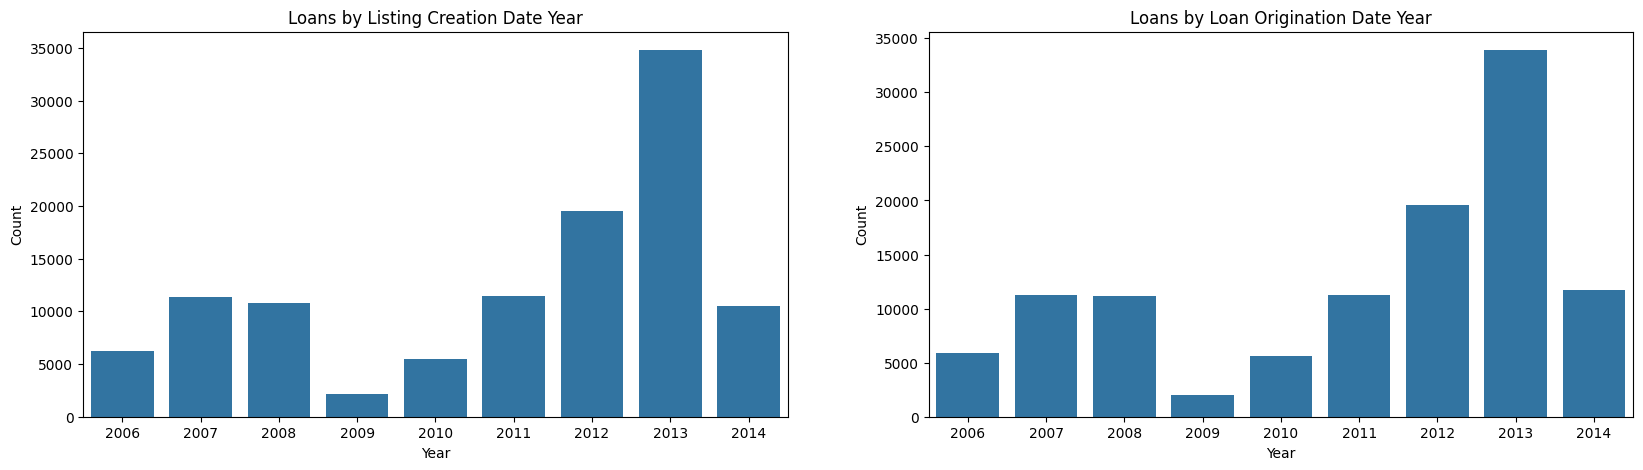

In [99]:
plt.figure(figsize = [20, 5])

# ListingCreationDate subplot
plt.subplot(1, 2, 1) 
sb.countplot(
    x=prosper_load_data_clean_df.ListingCreationDate.dt.year,
    color=base_color
);
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Loans by Listing Creation Date Year")

# LoanOriginationDate subplot
plt.subplot(1, 2, 2) 
sb.countplot(
    x=prosper_load_data_clean_df.LoanOriginationDate.dt.year,
    color=base_color
);
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Loans by Loan Origination Date Year");

As you can see, the count plots are pretty comparable with a mode at year 2013. There's a huge dip in 2009 which might be due to the 2008 global financial crisis. Let's focus now on the month of the year to see if there's higher activity on any of them.

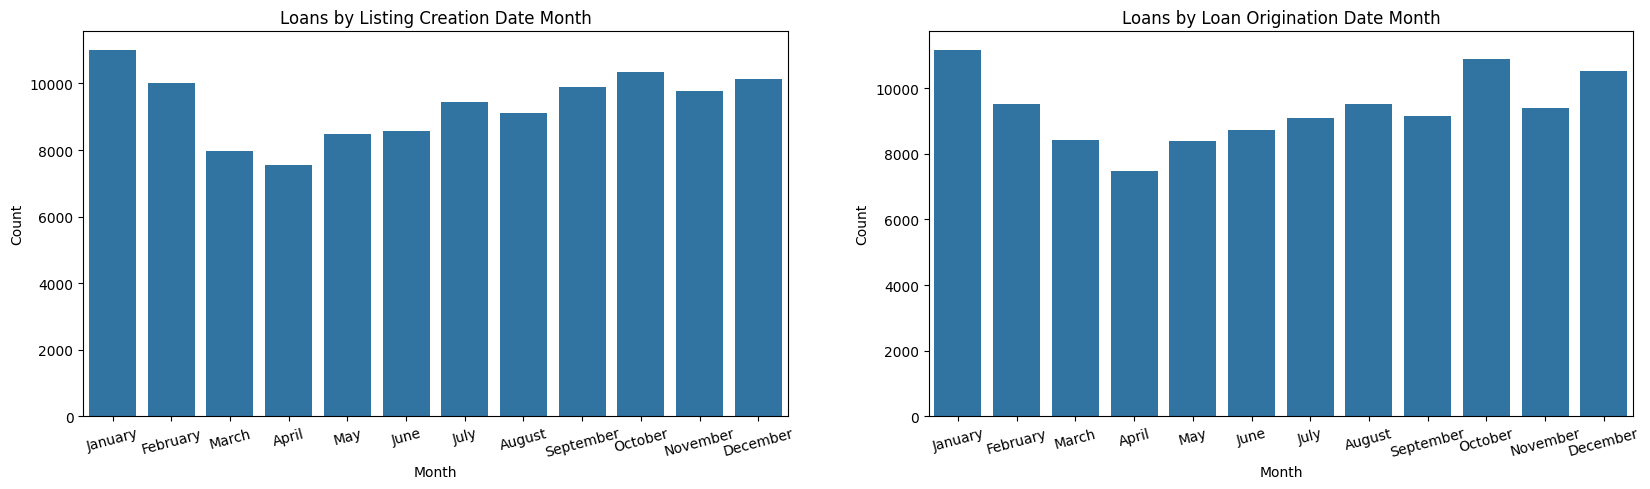

In [108]:
plt.figure(figsize = [20, 5])

month_names = list(map(lambda m: calendar.month_name[m], range(1, 13)))

# ListingCreationDate subplot
plt.subplot(1, 2, 1) 
sb.countplot(
    x=prosper_load_data_clean_df.ListingCreationDate.dt.month_name(),
    color=base_color,
    order=month_names
);
plt.xlabel("Month")
plt.xticks(rotation=15)
plt.ylabel("Count")
plt.title("Loans by Listing Creation Date Month")

# LoanOriginationDate subplot
plt.subplot(1, 2, 2) 
sb.countplot(
    x=prosper_load_data_clean_df.LoanOriginationDate.dt.month_name(),
    color=base_color,
    order=month_names
);
plt.xlabel("Month")
plt.xticks(rotation=15)
plt.ylabel("Count")
plt.title("Loans by Loan Origination Date Month");

Once again we see a similar distribution in both variables, but given the huge differences in the number of deals per year, it will be better if we explore the proportion of deals for each month for any given year.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

